In [18]:
## creating a very very simple and basic model that i will try to run on esp32
## inspired by my previous simple model which was still not simple enough for esp32 learning


from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

In [2]:
dataset = []
for i in range(5):
    mean = float(random.randint(-1,1))
    dataset.append(random.normal(loc=mean, size=5))


outputDataset = []
for i in range(5):
    mean = float(random.randint(12,13))
    outputDataset.append(random.normal(loc=mean, size=5))


In [ ]:
# for i in dataset:
#     sns.kdeplot(i)
# for i in outputDataset:
#     sns.kdeplot(i)
# plt.show()

In [5]:
input = np.array(dataset)
print(f'input shape --> {input.shape}')

output = np.array(outputDataset)
print(f'output shape --> {output.shape}')

input shape --> (5, 5)
output shape --> (5, 5)


In [7]:
#Define the model
model = Sequential([
    # Input layer (implicitly defined by input_shape in the first layer)
    Dense(16, activation='relu', input_shape=(5,)),  # First hidden layer with 128 units
    Dense(8, activation='relu'),  # Second hidden layer with 64 units
    Dense(4, activation='relu'),  # Third hidden layer with 32 units
    Dense(5)  # Output layer with 1 unit
])  

# Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error',  # Suitable for regression tasks; change as needed
              metrics=['accuracy'])

In [ ]:
model.fit(input, output, epochs=200)
#model.save('testingModel_betterDataset.h5')
#model = tf.keras.models.load_model("testingModel_betterDataset.h5")

In [10]:
testData = random.normal(size=5)

1/1 [==============================] - 0s 20ms/step
(5,)


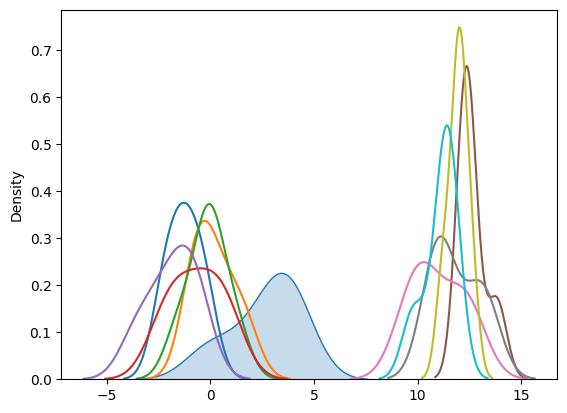

In [15]:
#input shape for the model should be (1,200)
predict = model.predict(np.expand_dims(testData, axis=0))
#Once we've predicted, we need to convert the output shape which is (1,200) to (200,)
predict = predict.reshape(-1)
print(predict.shape)
for i in input:
    sns.kdeplot(i)
for i in output:
    sns.kdeplot(i)
sns.kdeplot(predict, fill=True)
plt.show()

In [36]:

for i, layer in enumerate(model.layers):
    # Get configuration of each layer
    config = layer.get_config()
    weights = layer.get_weights()  # This returns a list of numpy arrays

    print(f"Layer {i}: {layer.name}")
    print("Configuration:", config)
    if weights:
        for j, weight_matrix in enumerate(weights):
            print(f"Weight Matrix {j}:")
            print(weight_matrix)
            print("Shape:", weight_matrix.shape)
    print("\n")

Layer 0: dense
Configuration: {'name': 'dense', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': (None, 5), 'units': 16, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
Weight Matrix 0:
[[ 0.00620434 -0.6473541  -0.69252264  0.09337141  0.17205106  0.19348022
  -0.2506813  -0.29310775  0.44564572 -0.11842991  0.16529326 -0.62393916
   0.50132805 -0.4948494  -0.66757995 -0.61312497]
 [ 0.42498448 -0.04812076 -0.5313283   0.37272     0.5013798  -0.78882706
   0.2548704  -0.3210273  -0.40067846 -0.5625638  -0.46858916 -0.55100894
   0.41275436 -0.3369235  -0.08764475 -0.31696665]
 [ 0.08332984 -0.12229476 -0.32348242  0.2468246   0.3620874   0.74873126
   0.1795486   0.49866503 -0.2909313   0.38620484  0.3441117   

In [23]:
# Suppose we want the output of the dense layer
layer_name = 'dense'  # You need to ensure the layer has this name or set it manually
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
# Get the output of the intermediate layer
intermediate_output = intermediate_layer_model.predict(np.expand_dims(testData, axis=0))
print(intermediate_output)
print(intermediate_output.shape)

1/1 [==============================] - 0s 39ms/step
[[0.49350938 0.44850495 0.04672396 2.1104596  0.         2.084035
  0.         0.9190114  0.         0.         0.47887915 0.
  0.51499474 0.         0.11238645 0.        ]]
(1, 16)


In [ ]:
TF_LITE_MODEL_FILE_NAME = "BANANAS.tflite"
#tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
#tflite_model = tf_lite_converter.convert()
#open(TF_LITE_MODEL_FILE_NAME, "wb").write(tflite_model)

# interpreter = tf.lite.Interpreter(model_path = TF_LITE_MODEL_FILE_NAME)
# input_details = interpreter.get_input_details()
# output_details = interpreter.get_output_details()
# interpreter.allocate_tensors()
# interpreter.set_tensor(input_details[0]['index'], np.expand_dims(random.normal(size=200), axis=0).astype(np.float32))
# interpreter.invoke()
# tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])
# print("Prediction results shape:", tflite_model_predictions.shape)
# predict = tflite_model_predictions.reshape(-1)
# sns.kdeplot(predict, fill=True)
# plt.show()

interpreter = tf.lite.Interpreter(model_path=TF_LITE_MODEL_FILE_NAME)
interpreter.allocate_tensors()

# Get tensor details
tensor_details = interpreter.get_tensor_details()

# Loop through each tensor and extract its weights
for tensor in tensor_details:
    index = tensor['index']
    weight = interpreter.get_tensor(index)
    print(f"Name: {tensor['name']}")
    print(f"Shape: {tensor['shape']}")
    print(f"Weights: {weight}\n")

# Cells below is converting matrix to byte arrays

In [98]:
# Create a numpy array from the matrix
#matrix_np = np.array([[1, 2], [3, 4]], dtype=np.int32)
matrix_np = intermediate_output

# Convert the numpy array to bytes
byte_array_np = matrix_np.tobytes()
# the output i got from the .tobytes method had characters that broke the string, like backticks, that was
# because python tries to print the characters in ascii readable characters therefore a standardized output
# was not what i was getting, a standardized bytes output looks like '\xhh' where hh is the single byte represented.
# to fix that, the line below formats the byte output appropriately.
formatted_byte_string = ''.join(f'\\x{b:02x}' for b in byte_array_np)


# --- to put the byte string in a bin file
# print(formatted_byte_string)
# with open("matrix_bytes1.bin", "wb") as file:
#    file.write(byte_array_np)

# --- to restore the original array from byte string, a sanity check
# restored_matrix_np = np.frombuffer(byte_array_np, dtype=np.float32).reshape(matrix_np.shape)
# print("Restored Numpy Array:\n", restored_matrix_np)

In [101]:
print(intermediate_output * 2)

[[0.98701876 0.8970099  0.09344792 4.220919   0.         4.16807
  0.         1.8380228  0.         0.         0.9577583  0.
  1.0299895  0.         0.2247729  0.        ]]


In [146]:
weight_strings = ''
#weight_strings+=str(len(model.layers))  # log total number of layers at the start 
#print(model.layers[0].get_weights()[1])   #list[0-3].list[0-1]

def ensure_two_dimensions(arr, axis=1):
    if arr.ndim == 1:
        arr = np.expand_dims(arr, axis=axis)
    return arr

for i, layer in enumerate(model.layers):
    #break
    # Get configuration of each layer
    config = layer.get_config()
    weights = layer.get_weights()  # This returns a list of numpy arrays

    print(f"Layer {i}: {layer.name}")
    #weight_strings+=f"${i}{layer.name}"
    #weights_strings+="$"
    #print("Configuration:", config)
    if weights:
        weight_strings+="$"
        for j, weight_matrix in enumerate(weights):
            print(f"Weight Matrix {j}:")
            if j!=0 : weight_strings+='^'
            shape_str = str(ensure_two_dimensions(weight_matrix).shape)
            shape_str = shape_str.replace('(', '').replace(')', '')
            shape_str = shape_str.replace(' ','')
            weight_strings+='[' + shape_str + ']'
            #print(weight_matrix)
            byte_array_np = weight_matrix.tobytes()
            formatted_byte_string = ''.join(f'\\x{b:02x}' for b in byte_array_np)
            weight_strings+= formatted_byte_string
            
            print("Shape:", weight_matrix.shape)
    print("\n")
weight_strings+="$"
    
    
print(weight_strings)

Layer 0: dense
Weight Matrix 0:
Shape: (5, 16)
Weight Matrix 1:
Shape: (16,)


Layer 1: dense_1
Weight Matrix 0:
Shape: (16, 8)
Weight Matrix 1:
Shape: (8,)


Layer 2: dense_2
Weight Matrix 0:
Shape: (8, 4)
Weight Matrix 1:
Shape: (4,)


Layer 3: dense_3
Weight Matrix 0:
Shape: (4, 5)
Weight Matrix 1:
Shape: (5,)


$[5,16]\xce\x4d\xcb\x3b\x00\xb9\x25\xbf\x2a\x49\x31\xbf\x82\x39\xbf\x3d\x27\x2e\x30\x3e\xae\x1f\x46\x3e\x4d\x59\x80\xbe\x38\x12\x96\xbe\xad\x2b\xe4\x3e\x61\x8b\xf2\xbd\xa3\x42\x29\x3e\x7a\xba\x1f\xbf\x09\x57\x00\x3f\xe7\x5c\xfd\xbe\x85\xe6\x2a\xbf\xc2\xf5\x1c\xbf\x91\x97\xd9\x3e\x45\x1a\x45\xbd\x22\x05\x08\xbf\x28\xd5\xbe\x3e\x6d\x5a\x00\x3f\x92\xf0\x49\xbf\x60\x7e\x82\x3e\xb1\x5d\xa4\xbe\xba\x25\xcd\xbe\x2e\x04\x10\xbf\xeb\xea\xef\xbe\xec\x0e\x0d\xbf\x8a\x54\xd3\x3e\x3d\x81\xac\xbe\x17\x7f\xb3\xbd\x74\x49\xa2\xbe\xd6\xa8\xaa\x3d\xad\x75\xfa\xbd\x7d\x9f\xa5\xbe\x97\xbf\x7c\x3e\x85\x63\xb9\x3e\xda\xac\x3f\x3f\x97\xdb\x37\x3e\x06\x51\xff\x3e\xf3\xf4\x94\xbe\xa4\xbc\xc5\x3e\x69

In [134]:
a = np.array([[16,1],[16,1]])
print(a.shape)

def ensure_two_dimensions(arr, axis=1):
    if arr.ndim == 1:
        arr = np.expand_dims(arr, axis=axis)
    return arr
a = ensure_two_dimensions(a)
print(a.shape)

(2, 2)
(2, 2)


In [154]:
char = '^'

# Encode as bytes in UTF-8
byte_string = char.encode('utf-8')

print(byte_string)

hex_representation = byte_string.hex()
print(hex_representation)

b'^'
5e
